In [ ]:
# 先下載台北黑體字型
# https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta' # 步驟一（替換sans-serif字型）
plt.rcParams["axes.unicode_minus"] = False  # 步驟二（解決座標軸負數的負號顯示問題）

In [ ]:
!pip install yfinance
!pip install mplfinance

In [11]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import mplfinance as mpf

In [18]:
data = yf.download("00690.tw",start='2020-06-01',end='2020-12-31')
# data = yf.download("00690.tw",period='1d',interval='5m')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-01,22.000000,22.139999,22.000000,22.059999,22.059999,256299
2020-06-02,22.150000,22.290001,22.150000,22.200001,22.200001,269000
2020-06-03,22.389999,22.670000,22.389999,22.670000,22.670000,276409
2020-06-04,22.809999,22.820000,22.670000,22.750000,22.750000,198108
2020-06-05,22.830000,22.879999,22.790001,22.870001,22.870001,277001
...,...,...,...,...,...,...
2020-12-24,27.600000,27.629999,27.549999,27.549999,27.549999,139180
2020-12-25,27.719999,27.770000,27.600000,27.639999,27.639999,43117
2020-12-28,27.700001,27.940001,27.690001,27.910000,27.910000,270284


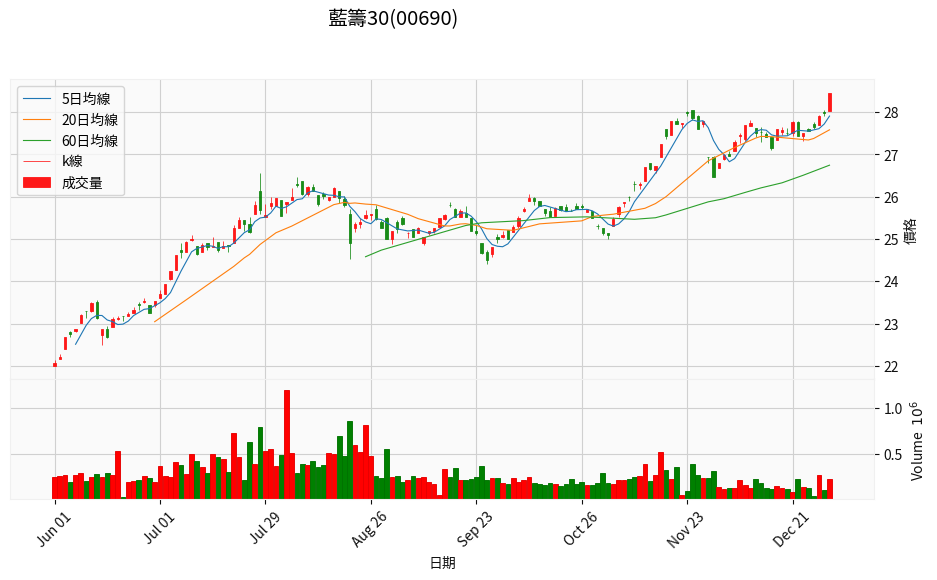

In [24]:
target_stock = '藍籌30(00690)' #設定要繪製走勢圖的股票

#針對線圖的外觀微調，將上漲設定為紅色，下跌設定為綠色，符合台股表示習慣
mc = mpf.make_marketcolors(up='r',down='g',inherit=True)

#接著把自訂的marketcolors放到自訂的style中，而這個改動是基於預設的yahoo外觀
#解决mplfinance绘制输出中文乱码
s  = mpf.make_mpf_style(base_mpf_style='yahoo',marketcolors=mc,rc={'font.family':'Taipei Sans TC Beta'}  )

#設定可變參數kwargs，並在變數中填上繪圖時會用到的設定值
kwargs = dict(type='candle',ylabel="價格", mav=(5,20,60), volume=True, figratio=(12,6), figscale=0.75, title=target_stock, style=s) 

#選擇df資料表為資料來源，帶入kwargs參數，畫出目標股票的走勢圖
fig, axes =mpf.plot(data, **kwargs,figsize=(12,6),returnfig=True)

axes[-2].set_xlabel('日期')   #設定X軸

str_label=['5日均線','20日均線','60日均線','k線','成交量']   #設定Legend 名稱
axes[0].legend(str_label,loc='best');   #設定Legend

In [ ]:
data.reset_index(inplace=True)  #重設索引
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-27,20.000000,20.000000,20.000000,20.000000,20.000000,0
1,2017-03-28,20.000000,20.000000,20.000000,20.000000,20.000000,0
2,2017-03-29,19.969999,19.969999,19.969999,19.969999,19.969999,0
3,2017-03-30,19.910000,19.910000,19.910000,19.910000,19.910000,0
4,2017-03-31,19.950001,20.000000,19.900000,19.910000,19.910000,2891000
...,...,...,...,...,...,...,...
918,2020-12-24,27.600000,27.629999,27.549999,27.549999,27.549999,139180
919,2020-12-25,27.719999,27.770000,27.600000,27.639999,27.639999,43117
920,2020-12-28,27.700001,27.940001,27.690001,27.910000,27.910000,270284
921,2020-12-29,28.000000,28.040001,27.910000,27.980000,27.980000,108253


In [ ]:
plt.rcParams["figure.figsize"] = (12,6)

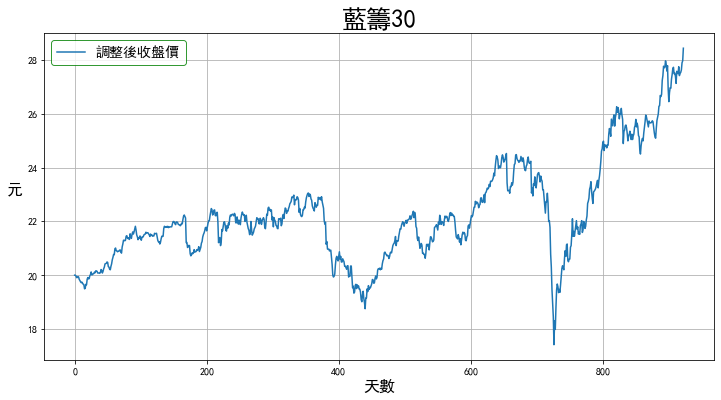

In [ ]:
data['Adj Close'].plot(grid=True,label='調整後收盤價')
plt.title('藍籌30', fontsize=25)
plt.ylabel('元  ', size=16,rotation='horizontal')
plt.xlabel('天數', fontsize=16)
plt.legend(edgecolor='green', fontsize=14);

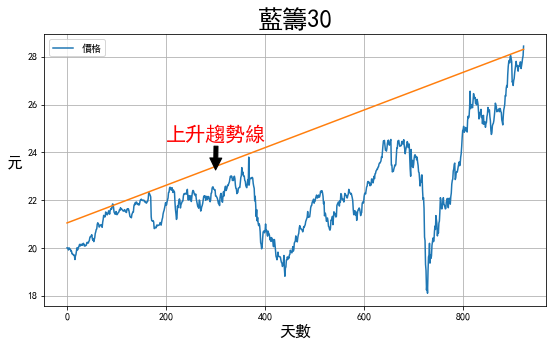

In [ ]:
df['High'].plot()

# 添加文字 
plt.annotate('上升趨勢線',fontsize=20,color='red',  xy=(300, 23.2), xytext=(200, 24.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('藍籌30', fontsize=25)
plt.ylabel('元  ', size=16,rotation='horizontal')
plt.xlabel('天數', fontsize=16)
plt.legend(['價格'],edgecolor='green', fontsize=14)
df['High_Trend'].plot(grid=True,figsize=(9,5));

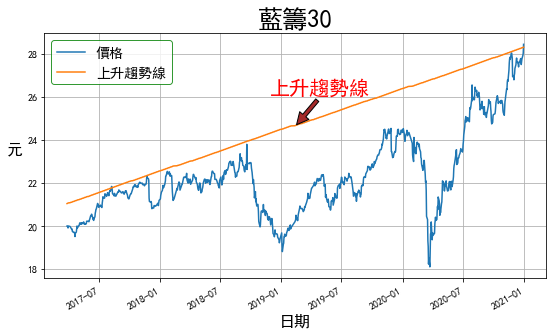

In [ ]:
df.plot(x='Date',y=['High','High_Trend'],grid=True,figsize=(9,5))

# 添加文字 
plt.annotate('上升趨勢線',fontsize=20,color='red',xycoords='axes fraction', xy=(0.5, 0.62),xytext=(0.45, 0.75),
            arrowprops=dict(facecolor='brown', shrink=0.05))


plt.title('藍籌30', fontsize=25)
plt.ylabel('元  ', size=16,rotation='horizontal')
plt.xlabel('日期', fontsize=16)
plt.legend(['價格','上升趨勢線'],edgecolor='green', fontsize=14);

In [ ]:
price = np.array(data.High)
date =pd.to_datetime(data.Date)

In [ ]:
# 尋找峰值
from scipy.signal import argrelextrema
max_index = argrelextrema(price, np.greater)
peak = price[max_index]  
print(f"peak:{peak}")

peak:[20.         19.86000061 19.76000023 19.70999908 20.         20.14999962
 20.13999939 20.14999962 20.19000053 20.11000061 20.22999954 20.54999924
 20.38999939 21.04999924 20.96999931 21.36000061 21.32999992 21.5
 21.54999924 21.64999962 21.84000015 21.52000046 21.60000038 21.68000031
 21.63999939 21.60000038 21.63999939 21.62999916 21.81999969 21.89999962
 21.92000008 21.85000038 21.85000038 22.04000092 22.         21.94000053
 22.30999947 21.13999939 20.86000061 21.05999947 21.88999939 22.54000092
 22.48999977 22.52000046 22.42000008 21.75       22.04999924 22.26000023
 22.28000069 22.28000069 22.45000076 22.19000053 22.18000031 22.25
 22.         22.18000031 22.17000008 22.14999962 21.95999908 22.28000069
 22.35000038 22.57999992 22.62000084 23.         23.01000023 22.86000061
 23.         22.32999992 23.36000061 23.18000031 23.03000069 22.86000061
 23.79999924 22.92000008 22.95000076 22.15999985 21.60000038 21.27000046
 21.01000023 21.         20.73999977 20.70000076 20.4200000

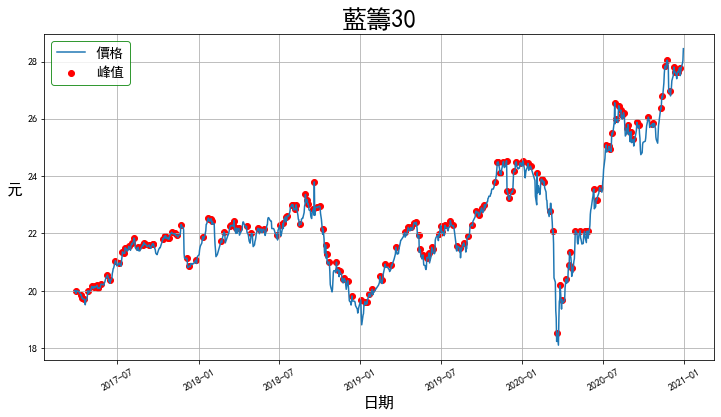

In [ ]:
# 繪圖峰值
plt.figure(figsize=(12,6))
plt.plot(date,price)
plt.xticks(rotation = 30)
for index in max_index:
    plt.scatter(date[index],price[index],c="r")

plt.grid()
plt.title('藍籌30', fontsize=25)
plt.ylabel('元  ', size=16,rotation='horizontal')
plt.xlabel('日期', fontsize=16)
plt.legend(['價格','峰值'],edgecolor='green', fontsize=14)
plt.show()

In [ ]:
# 計算移動平均
df['5MA']=df['High'].ewm(span=5).mean()
df['20MA']=df['High'].ewm(span=20).mean()

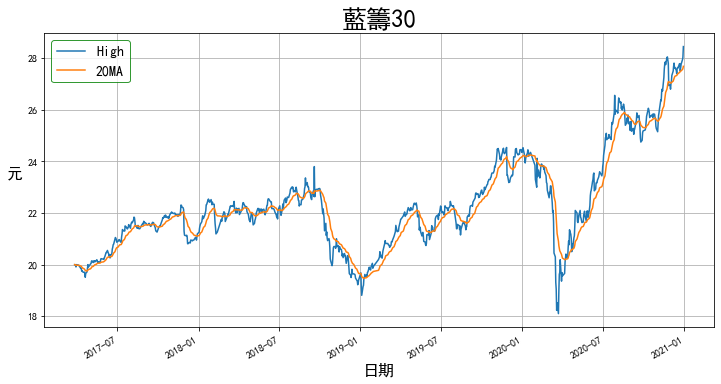

In [ ]:
# 移動平均繪圖比較
df.plot(x='Date',y=['High','20MA'],figsize=(12,6))

plt.xticks(rotation = 30)

plt.grid()
plt.title('藍籌30', fontsize=25)
plt.ylabel('元  ', size=16,rotation='horizontal')
plt.xlabel('日期', fontsize=16)
plt.legend(edgecolor='green', fontsize=14)
plt.show()

            14             13             12             11
-9.481e-35 x  + 6.216e-31 x  - 1.821e-27 x  + 3.145e-24 x 
             10             9             8             7             6
 - 3.56e-21 x  + 2.776e-18 x - 1.526e-15 x + 5.938e-13 x - 1.618e-10 x
              5             4             3            2
 + 3.008e-08 x - 3.627e-06 x + 0.0002608 x - 0.009659 x + 0.1527 x + 19.34


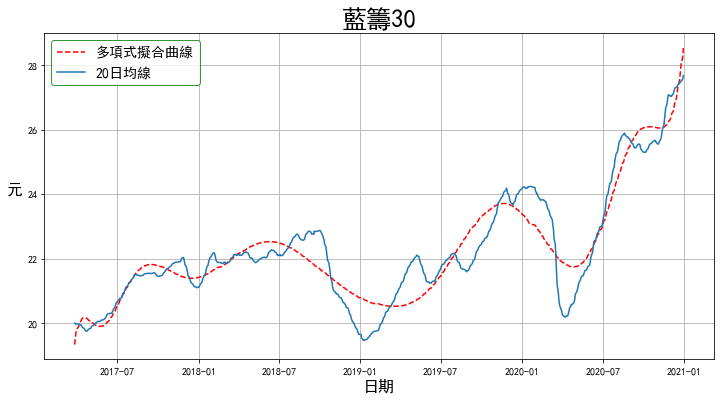

In [ ]:
print(parameter_fn) #在屏幕上打印擬合多項式
plt.figure(figsize=(12,6))
plt.plot(date,parameter_fn(x),c="r",linestyle="--",label='多項式擬合曲線')
plt.plot(date,y,label='20日均線')

plt.grid()
plt.title('藍籌30', fontsize=25)
plt.ylabel('元  ', size=16,rotation='horizontal')
plt.xlabel('日期', fontsize=16)
plt.legend(loc='best',edgecolor='green', fontsize=14)   #指定legend的位置,讀者可以自己help它的用法
plt.show()